# Wpływ cech czerwonego wina na jego jakość - eksploracja danych
## Autorzy: Jakub Kosterna, Bartosz Siński, Jan Smoleń


Temat naszej pracy to badanie wpływu fizykochemicznych właściwości czerwonego wina na jego jakość. Posługujemy się danymi dotyczącymi czerwonego wariantu portugalskiego vinho verde .

In [82]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
wines_df=pd.read_csv("winequality-red.csv")

Przyjrzyjmy się na początku ogólnym informacjom o naszym zbiorze danych.

In [36]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


## Objaśnienie zmiennych <br>  
**fixed acidity** - kwasowość stała, czyli zawartość kwasów, których nie można oddzielić przez wyparowanie <br>  
**volatile acidity** - kwasowość lotna, czyli zawartość kwasów, które można odparować, głównie kwasu octowego. Jeżeli jest ich za dużo, mogą spodować niedobry, kwaśny smak <br>  
**citric acid** - zawartość kwasu cytrynowego, zwykle niska. Może dodać winu świeżości i głębi.  <br>  
**residual sugar** - nieodfermentowany cukier, którego zawartość wyrażana jest w w g/l wina. Za wina wytrawne uważa się te zawierające do ok. 10 g/l cukru resztkowego, za słodkie - powyżej 50 g/l. <br>  
**chlorides** - zawartość różnych soli w winie <br>    
**free sulfur dioxide** - zawartość cząsteczek dwutlenku siarki niezwiązanych z innymi cząsteczkami. Chroni wina przed zepsuciem, w za dużych ilościach może psuć smak wina. <br>  
**total sulfur dioxide** - całkowita zawartość dwutlenku siarki <br>  
**denisty** - gęstość wina, zależy w dużym stopniu od zawartości cukrów i alkoholu. <br>  
**pH** - wksaźnik pH świadczący o kwasowości/zasadowości wina. Niskie pH oznacza wysoką kwasowość.  <br>  
**sulphates** - zawartość siarczynów, substancji odpowiedzialnych za konserwowanie wina. <br>  
**alcohol** - procentowa zawartość alkoholu <br>  
**quality** - subiektywna ocena jakości wina w skali 0-10. Wystawiana jako mediana ocen minimum trzech degustatorów.<br>


Do naszej ramki danych dodajemy też nową kolumnę **is_good**, która oznacza czy wino jest dobre, czyli uzyskało ocenę co najmniej 6.

In [38]:
wines_df["is_good"]=wines_df.apply(lambda row: 1 if row.quality > 5 else 0, axis = 1)

In [39]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  is_good               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


Jak widzimy, w naszym zbiorze nie występuje problem braku danych.

In [40]:
wines_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_good
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


Przyjrzyjmy się rozkładom poszczególnych zmiennych.

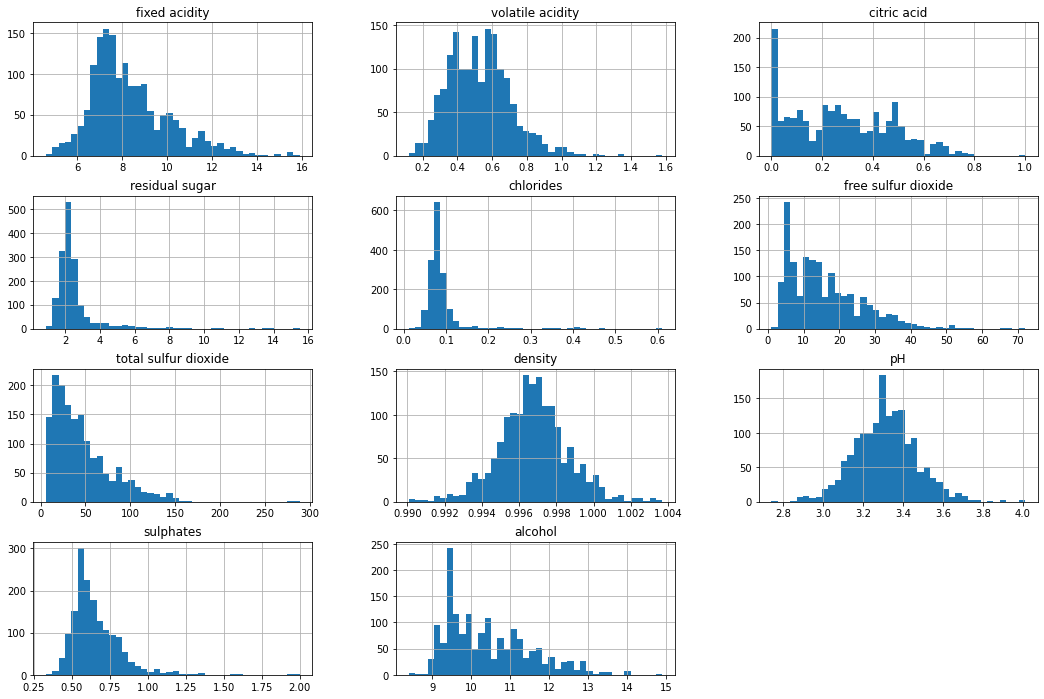

In [53]:
wines_df.drop(["quality", "is_good"], axis=1).hist(bins = 40, figsize=(18, 12))
plt.show()

Patrząc na rozkłady zmiennych ciągłych widzimy, że wiele z nich przypomina dosyć mocno rozkład normalny. Spójrzmy jeszcze na rozkład naszych zmiennych kategorycznych dotyczących jakości wina. 

<AxesSubplot:xlabel='is_good', ylabel='count'>

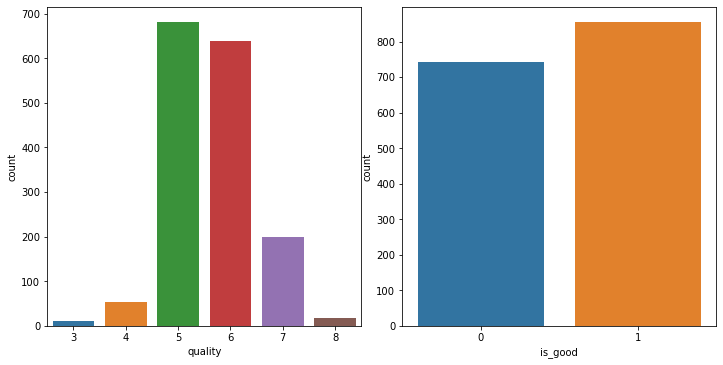

In [78]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
fig.tight_layout(pad=1)
sns.countplot(x="quality", data=wines_df, ax=axs[0])
sns.countplot(x="is_good", data=wines_df, ax=axs[1])

Teraz zajmiemy się macierzą korelacji.

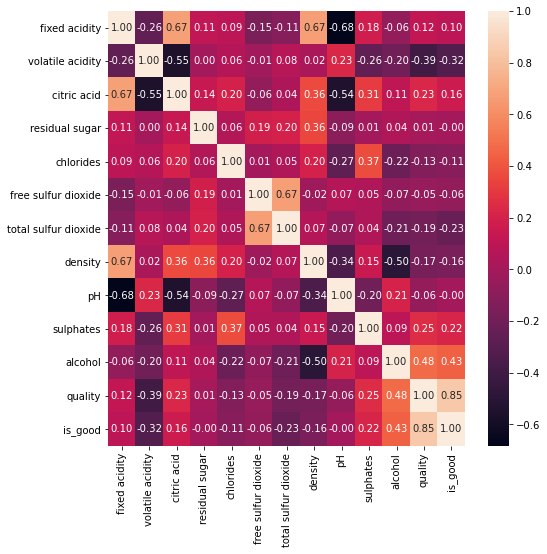

In [80]:
plt.figure(figsize=(8,8))
sns.heatmap(wines_df.corr(), annot=True, annot_kws={'size': 10}, fmt='.2f')
plt.show()

Zbadamy teraz zależności pomiędzy najlepiej skorelowanymi ze sobą zmiennymi.

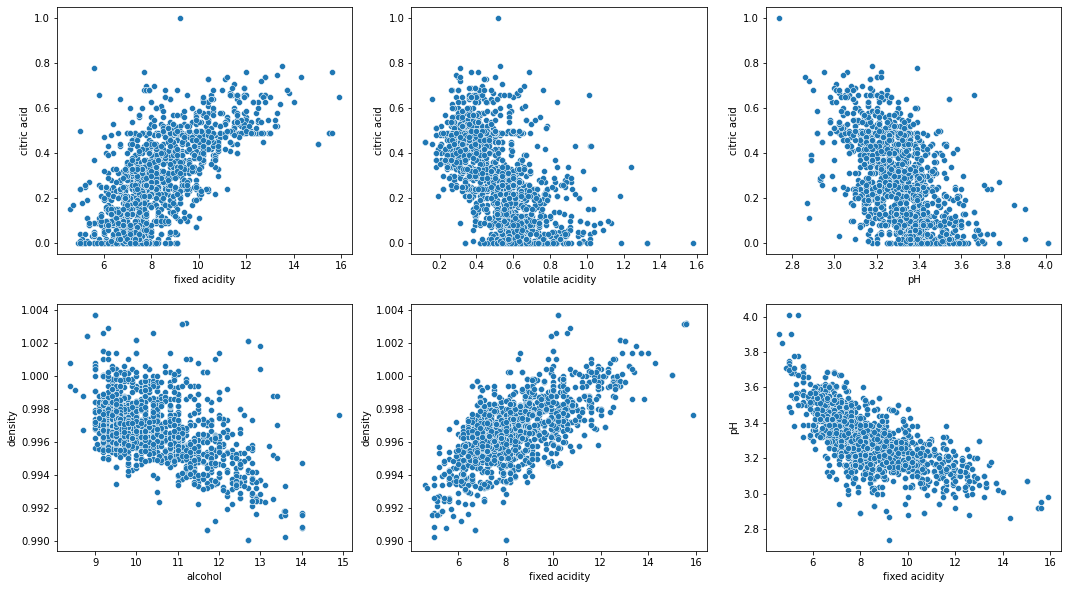

In [95]:
fig, axs = plt.subplots(ncols=3,nrows=2, figsize=(18,10))
sns.scatterplot(data=wines_df, x="fixed acidity", y="citric acid",ax=axs[0, 0])
sns.scatterplot(data=wines_df,x="volatile acidity",y="citric acid",ax=axs[0, 1])
sns.scatterplot(data=wines_df,x="pH",y="citric acid",ax=axs[0, 2])
sns.scatterplot(data=wines_df,x="alcohol",y="density",ax=axs[1, 0])
sns.scatterplot(data=wines_df,x="fixed acidity",y="density",ax=axs[1,1])
sns.scatterplot(data=wines_df,x="fixed acidity",y="pH", ax=axs[1,2])
plt.show()

Teraz spójrzmy na to, jak zmienne, które mają największy związek z jakością wina, wpływają na jego ocenę.

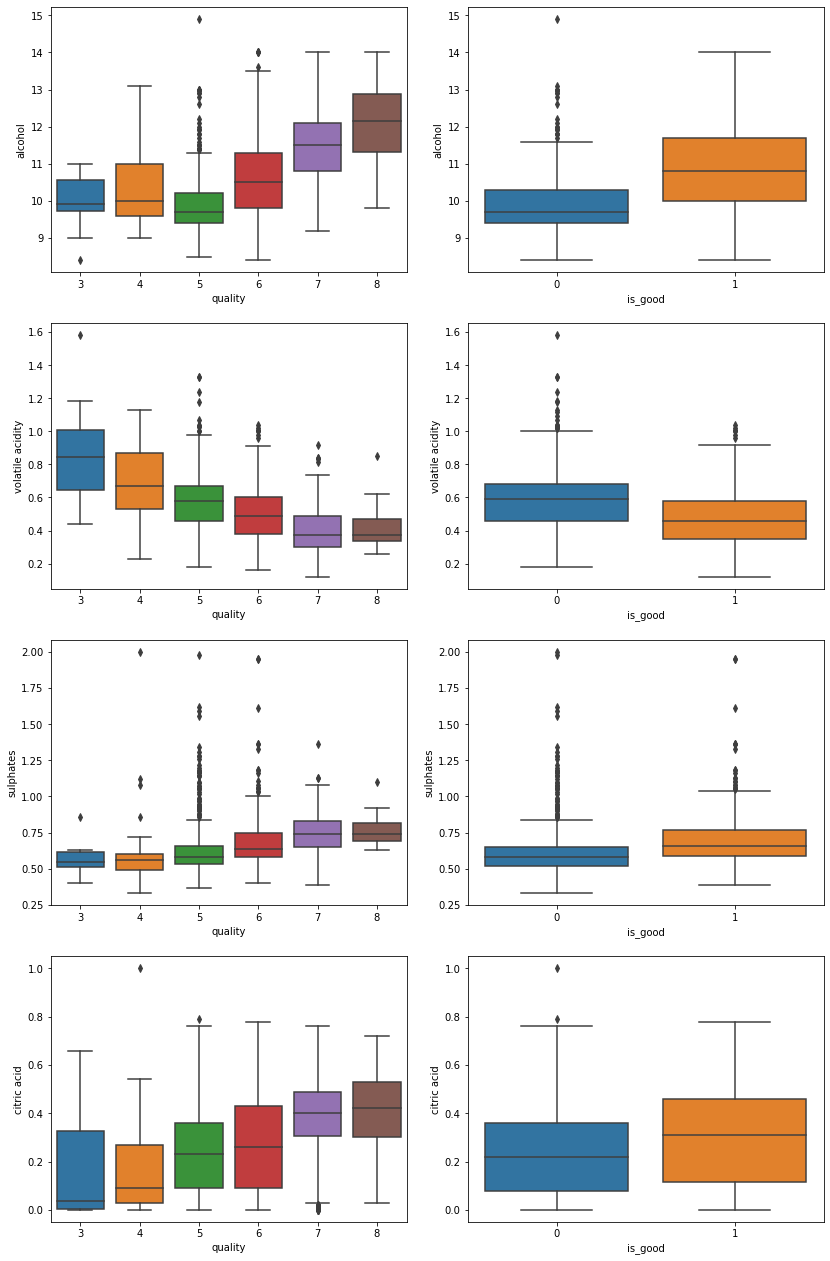

In [96]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(12, 18))
fig.tight_layout(pad=3.0)
sns.boxplot(data=wines_df,x="quality",y="alcohol",ax=axs[0, 0])
sns.boxplot(data=wines_df,x="is_good",y="alcohol",ax=axs[0, 1])
sns.boxplot(data=wines_df,x="quality",y="volatile acidity",ax=axs[1,0])
sns.boxplot(data=wines_df,x="is_good",y="volatile acidity",ax=axs[1,1])
sns.boxplot(data=wines_df,x="quality",y="sulphates",ax=axs[2,0])
sns.boxplot(data=wines_df,x="is_good",y="sulphates",ax=axs[2,1])
sns.boxplot(data=wines_df,x="quality",y="citric acid",ax=axs[3,0])
sns.boxplot(data=wines_df,x="is_good",y="citric acid",ax=axs[3,1])
plt.show()

Na koniec weźmiemy dwie zmienne, które mają największy wpływ na jakoś naszego wina - volatile acidity i alcohol, i sprawdzimy, czy samej ich podstawie dałoby się stwierdzić czy wino jest dobre, czy złe.

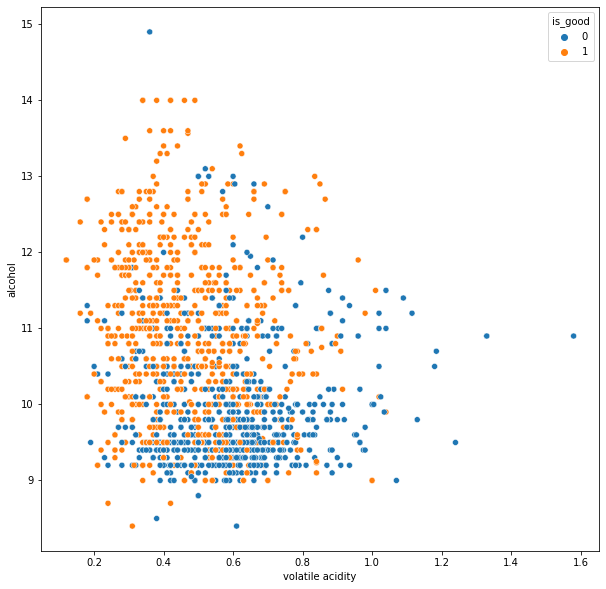

In [97]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=wines_df,x="volatile acidity",y="alcohol",hue="is_good")
plt.show()

Jak widzimy, na takim wykresie da się zaznaczyć obszary, w których występują prawie tylko wina złe bądź dobre, jednak wartość is_good dla wielu win ciężko byłoby  stwierdzić na podstawie tylko takich informacji.